<a href="https://colab.research.google.com/github/sfiddes/teaching/blob/main/Clustering/Clustering101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set-up**
First we want to install the packages we need that are not standard in google collab (mainly - the data set that we want to use)

In [2]:
pip install palmerpenguins

Import the packages that we want to use


In [3]:
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from palmerpenguins import load_penguins
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#**Data**
Import the data and take a look at it. 
- The data has been loaded as a Pandas DataFrame
- You can see that there are both categorical and quantitative metrics 
- Try plotting some of the data (hint - sns.scatterplot(dataframe,x=x,y=x,hue=category) )


**Questions**
- What will you try to predict? 
- What will you use to predict it? 
- Are your predictors normally discributed (or close enough?) (hint - sns.displot(dataframe, x=x, hue=category, kind="kde") ) 

In [40]:
# Import
penguins = load_penguins()

In [41]:
# Print dataframe (can also use dataframe.head() or dataframe.tail())
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Plot a scatter plot here, or use 'Show code' for an example

In [6]:
# Try your scatter plot here

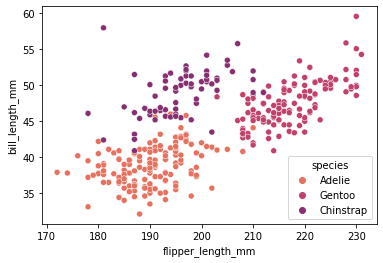

In [91]:
#@title Scatter plot { display-mode: "form" }

sns.scatterplot(data=penguins,x='flipper_length_mm',y='bill_length_mm',hue='species',palette='flare'); 

See if the data is normally distributed or use 'Show code' for an example

In [94]:
# Try your own dist plot here

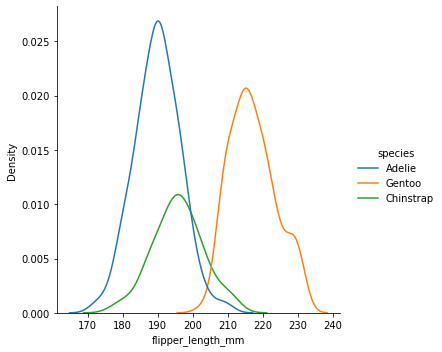

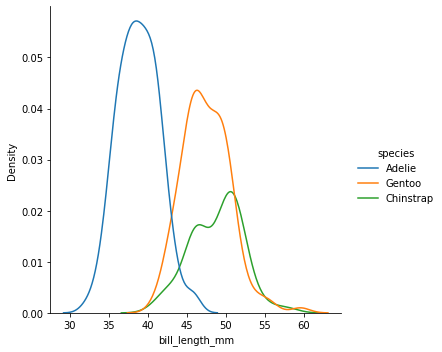

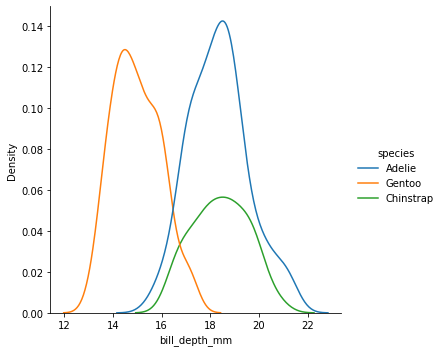

In [100]:
#@title Distrubution plots
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde"); 
sns.displot(penguins, x="bill_length_mm", hue="species", kind="kde"); 
sns.displot(penguins, x="bill_depth_mm", hue="species", kind="kde"); 

# **Prep your data for clustering:**
- Select the predictors you want to use 
- Normalise the data, otherwise the largest field will dominate (because we are using the Eucludian distance)

In [102]:
#@title What features will you choose? { display-mode: "both" }
features = ['bill_length_mm', 'flipper_length_mm','bill_depth_mm']

print('I chose: bill length, depth and flipper lenght!')


I chose: bill length, depth and flipper lenght!


In [75]:
# features = ['var1','varN'] - select your variables

In [76]:
data = penguins[features].dropna().copy() # select the features 
X = data.to_numpy() # convert them into a numpy array 

In [77]:
X.shape # check what shape X is 

(342, 3)

In [78]:
XNorm = preprocessing.normalize(X,axis=0,) # normalise each feature

In [79]:
XNorm.min(axis=0), XNorm.max(axis=0) # Check data

(array([0.03921848, 0.04617901, 0.04103108]),
 array([0.07281686, 0.06201948, 0.06734108]))

#**K-means clustering**

- How many clusters do we want to find? 
- Run through K-means (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Evaluate


In [80]:
n = 3 # number of clusters 

In [81]:
kmeans = KMeans(n_clusters=n, random_state=0).fit(XNorm)

In [ ]:
kmeans.cluster_centers_ # The centres (means) of each cluster

In [ ]:
kmeans.labels_ # the label assigned to each data point

In [84]:
data['species']=kmeans.labels_ # Add the labels into the dataframe holding the predictors 

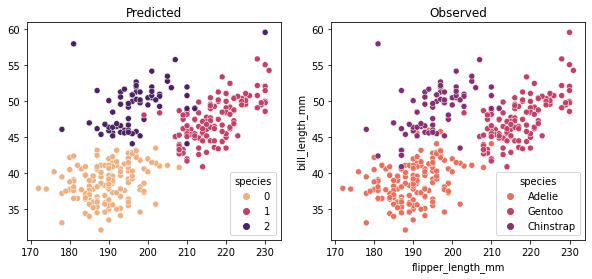

In [99]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(data=data,x=X[:,1],y=X[:,0],hue='species',palette='flare',ax = axes[0]);
axes[0].set_title('Predicted')

sns.scatterplot(data=penguins,x='flipper_length_mm',y='bill_length_mm',hue='species',palette='flare',ax = axes[1]);
axes[1].set_title('Observed');

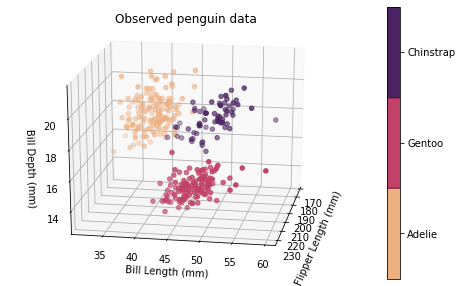

In [70]:
#@title Make a 3D scatter plot { display-mode: "both" }
c = penguins.species.copy() # need to make categorial groups quantitative [0,1,2]
c[np.where(c=='Adelie')[0]] = 0
c[np.where(c=='Gentoo')[0]] = 1
c[np.where(c=='Chinstrap')[0]] = 2

fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')
p = ax.scatter3D(penguins.flipper_length_mm, penguins.bill_length_mm, penguins.bill_depth_mm, c=c, # plot in 3D: x,y,z and c (colour)
                 cmap=sns.color_palette('flare',as_cmap=True)); 
cbar = plt.colorbar(p,drawedges=True,ticks=[0,1,2],boundaries=np.arange(-0.5,3.5,1)); # add the colour bar 
cbar.set_ticklabels(['Adelie','Gentoo','Chinstrap']) # set color bar tick labels (so not 0,1,2)
ax.view_init(20, 10) # make the viewing angle more optimal
ax.set_xlabel('Flipper Length (mm)');
ax.set_ylabel('Bill Length (mm)');
ax.set_zlabel('Bill Depth (mm)');
plt.title('Observed penguin data');
